In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import sklearn
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix 

print(f"numpy version {np.__version__}")
print(f"pandas version {pd.__version__}")
print(f"matplotlib version {mpl.__version__}")
print(f"seaborn version {sns.__version__}")
print(f"sklearn version {sklearn.__version__}")
%matplotlib inline

numpy version 1.23.1
pandas version 1.4.3
matplotlib version 3.5.2
seaborn version 0.11.2
sklearn version 1.1.1


In [2]:
DATA_PATH = 'C:\\Users\\human\\Desktop\\mlops_sam\\data\\sales_forecast\\'

train = pd.read_csv(DATA_PATH + 'train.csv')
test = pd.read_csv(DATA_PATH + 'test.csv')
submission = pd.read_csv(DATA_PATH + 'sample_submission.csv')

train.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68


In [3]:
train.tail()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20
6254,6255,45,28/09/2012,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,8.684,False,713173.95


In [4]:
train.describe()

,id,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,Weekly_Sales
count,6255.000000,6255.000000,6255.000000,6255.000000,2102.000000,1592.000000,1885.000000,1819.000000,2115.000000,6255.000000,6.255000e+03
mean,3128.000000,23.000000,60.639199,3.344369,7155.930661,3308.125810,1462.535523,3465.952501,4518.993173,8.029236,1.047619e+06
std,1805.807299,12.988211,18.624094,0.455364,8408.206085,9382.823804,9667.580258,6413.116294,6048.661908,1.874875,5.654362e+05
min,1.000000,1.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.410000,135.160000,4.077000,2.099862e+05
25%,1564.500000,12.000000,47.170000,2.917000,1844.295000,39.755000,4.700000,499.895000,1742.305000,6.916500,5.538695e+05
50%,3128.000000,23.000000,62.720000,3.413000,5221.140000,205.410000,24.600000,1532.630000,3226.410000,7.906000,9.604761e+05
75%,4691.500000,34.000000,75.220000,3.722000,9199.242500,1931.005000,104.010000,3640.905000,5444.030000,8.622000,1.421209e+06
max,6255.000000,45.000000,100.140000,4.308000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,14.313000,3.818686e+06


In [5]:
train_df = train.copy()

## 데이터 시각화 

### 결측치 확인

### 이상치 확인하기

In [6]:
#train_df['Store'].value_counts()

C:\Users\human\Desktop\mlops_sam\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\human\Desktop\mlops_sam\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\human\Desktop\mlops_sam\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

<AxesSubplot:xlabel='Promotion4'>

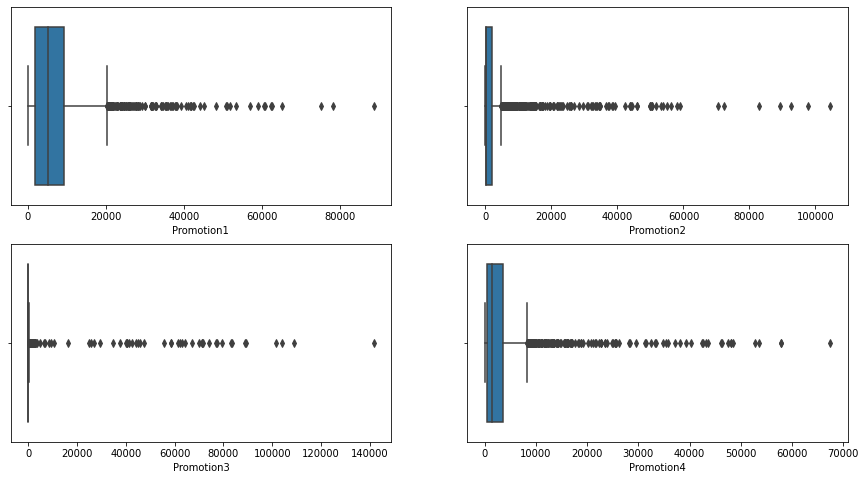

In [7]:
fig, ax = plt.subplots(2,2,figsize=(15,8))
sns.boxplot('Promotion1',data=train_df,ax=ax[0,0])
sns.boxplot('Promotion2',data=train_df,ax=ax[0,1])
sns.boxplot('Promotion3',data=train_df,ax=ax[1,0])
sns.boxplot('Promotion4',data=train_df,ax=ax[1,1])

C:\Users\human\Desktop\mlops_sam\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

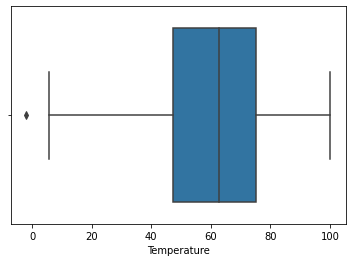

In [8]:
fig, ax = plt.subplots()
sns.boxplot('Temperature',data=train_df)

C:\Users\human\Desktop\mlops_sam\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Price'>

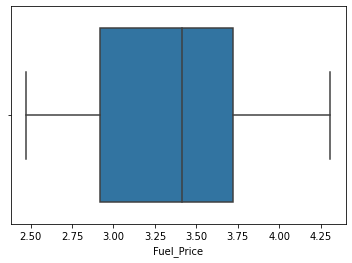

In [9]:
fig, ax = plt.subplots()
sns.boxplot('Fuel_Price',data=train_df)

C:\Users\human\Desktop\mlops_sam\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Unemployment'>

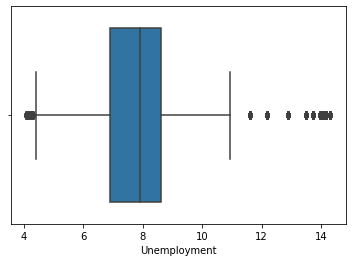

In [10]:
sns.boxplot('Unemployment',data=train_df)

C:\Users\human\Desktop\mlops_sam\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

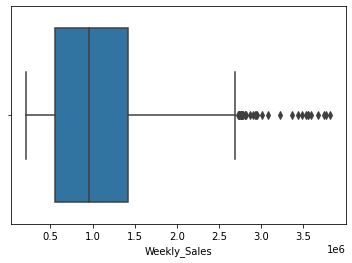

In [11]:
sns.boxplot('Weekly_Sales',data=train_df)

### 종속변수(Weekly_Sales) 분포확인

C:\Users\human\Desktop\mlops_sam\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

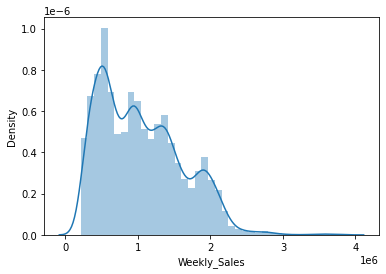

In [12]:
sns.distplot(train['Weekly_Sales'])

### Store별 Weekly_Sales

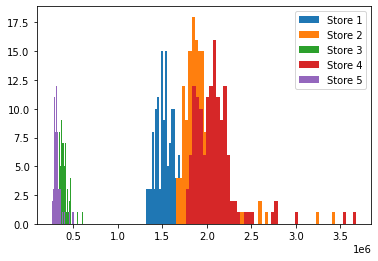

In [13]:
plt.hist(train[train.Store==1].Weekly_Sales, bins=50)
plt.hist(train[train.Store==2].Weekly_Sales, bins=50)
plt.hist(train[train.Store==3].Weekly_Sales, bins=50)
plt.hist(train[train.Store==4].Weekly_Sales, bins=50)
plt.hist(train[train.Store==5].Weekly_Sales, bins=50)
plt.legend(['Store 1','Store 2','Store 3','Store 4','Store 5'])
plt.show()

In [22]:
train_temp = train.drop(['id', 'Store'], axis = 1)
train_temp.head()

,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,False,1643690.90
1,12/02/2010,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,True,1641957.44
2,19/02/2010,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,False,1611968.17
3,26/02/2010,46.63,2.561,0.0,0.0,0.0,0.0,0.0,8.106,False,1409727.59
4,05/03/2010,46.50,2.625,0.0,0.0,0.0,0.0,0.0,8.106,False,1554806.68


In [16]:
train = train.fillna(0)
train.corr()

,id,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
id,1.000000e+00,9.997531e-01,-0.019554,0.075666,-0.067558,-0.038281,-0.022976,-0.048207,-0.016319,0.218548,1.475431e-16,-0.335276
Store,9.997531e-01,1.000000e+00,-0.022895,0.058628,-0.078069,-0.041374,-0.024165,-0.054933,-0.025559,0.223808,1.547191e-16,-0.335569
Temperature,-1.955428e-02,-2.289476e-02,1.000000,0.148054,-0.036441,-0.179502,-0.056469,-0.056934,-0.021019,0.102688,-1.555954e-01,-0.063231
Fuel_Price,7.566586e-02,5.862843e-02,0.148054,1.000000,0.291737,0.035377,0.021070,0.165578,0.206377,-0.025728,-7.148479e-02,0.010986
Promotion1,-6.755750e-02,-7.806938e-02,-0.036441,0.291737,1.000000,0.179187,-0.011782,0.840906,0.418595,-0.109561,-1.778345e-03,0.174760
Promotion2,-3.828072e-02,-4.137416e-02,-0.179502,0.035377,0.179187,1.000000,-0.005463,0.116013,0.137243,-0.045741,1.993897e-01,0.080928
Promotion3,-2.297640e-02,-2.416481e-02,-0.056469,0.021070,-0.011782,-0.005463,1.000000,-0.010385,0.045084,-0.020090,2.563126e-01,0.121613
Promotion4,-4.820734e-02,-5.493336e-02,-0.056934,0.165578,0.840906,0.116013,-0.010385,1.000000,0.306171,-0.080454,1.116521e-02,0.136850
Promotion5,-1.631912e-02,-2.555857e-02,-0.021019,0.206377,0.418595,0.137243,0.045084,0.306171,1.000000,-0.116473,-1.139007e-02,0.167161
Unemployment,2.185480e-01,2.238084e-01,0.102688,-0.025728,-0.109561,-0.045741,-0.020090,-0.080454,-0.116473,1.000000,6.666948e-03,-0.107331


<AxesSubplot:>

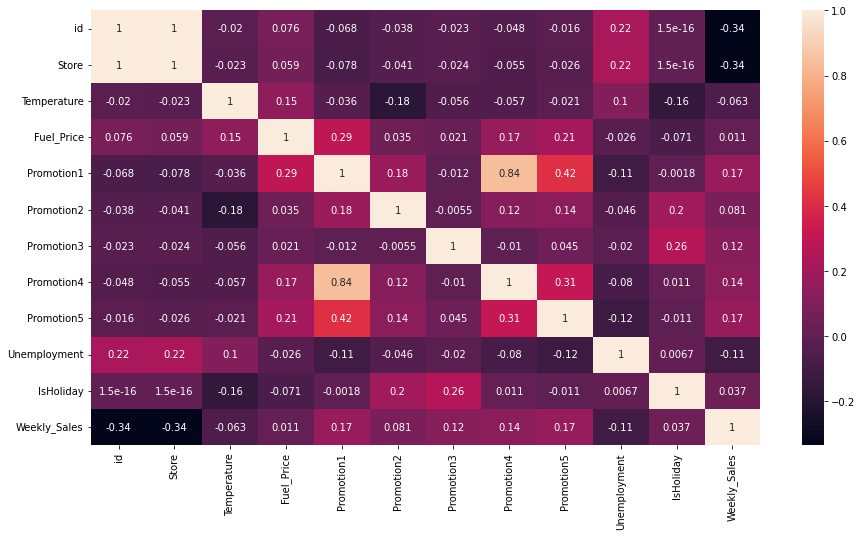

In [23]:
fig, ax =plt.subplots(figsize=(15,8))
sns.heatmap(train.corr(),annot=True)

- 프로모션 1,2,3,4의 결측치는 어떤경우들이 있을까?
    - 각각의 매장별로 2011년 11월 11일이전에는 전부 결측치이다
        - 이는 프로모션을 진행안한경우일까?
        - 나는 진행안한경우라고 생각하고 0을 때려박는다
    - 2011년 11월 11일 이후에는 프로모션을 진행했다고 생각한다.
        - 그치만 이경우에도 결측치가 존재한다
            - 진행을 안한날인가? 빼먹은걸까?
        - 결측치가 몇주연속인날도있다
            - 이경우에는 진짜 무엇?
- 프로모션 1,2,3,4의 경우 이상치도 많음을 확인
     - 이를 어찌 해결해야할까?
         - 스케일링기법을 사용해야된다
             - 어떤스케일링?
- unemployment(실업률)의 경우 아주 지멋대로인것을 확인할 수 있다. 또한 조금의 영향을 끼짐
    - 추후에 컬럼 삭제 유무에 따른 정확도 확인필요
- store마다 Weekly_Sales의 분포가 다름을 확인할수 있다
- Weekly_Sales의 값이 대체로 작은쪽에 분포되어 있다.
- Fuel_Price의 경우 지 멋대로이고 Weekly_Sales에 큰 영향을 안줌을 확인
    - 추후에 컬럼 삭제 유무에 따른 정확도 확인필요
- id값은 고유번호이므로 훈련모델에 사용하지않으니 컬럼 삭제
- 규칙적인 값은 Store와 IsHoliday 뿐
- 날짜 Date의 처리
    - 판다스 datetime사용
    - 년월일로 나눌것인가 아니면 년월로만 나눌것인가 
        - Weekly_sales니까 month까지? day까지?
        - day까지 나눈 후 날짜는 고정된 값이니까 day범위별로 Week 구간나누기 가능
            - 1,2,3,4필요하면 5까지
- IsHoliday의 True, False값을 1과 0으로 인코딩해주기